# Aula 06 - Dados nD -netCDF

Nesta aula trabalharemos com dados 3 ou 4 D em formato netCDF. Utilizamos o pacote https://docs.xarray.dev/en/stable/ e trabalharemos com os dados da plataforma https://disc.gsfc.nasa.gov/


## Baixando dados do GESDISC
-crie um login para você


In [1]:
# Caminhios para a pasta de dados
import os

#Pasta atual
pastaAtual = os.getcwd()
print(pastaAtual)
#Pasta dados
pastaDados=r'../dados'

#Lisrando arquivos
listaDados=os.listdir(pastaDados)
print(listaDados)

#Selecionando os arquivos do MERRA2
prefixed = [filename for filename in os.listdir(pastaDados) if filename.startswith("MERRA2")]
print(prefixed)

C:\Users\DaphneCalazans\OneDrive - altageotecnia.com\Área de Trabalho\Daphne\Pessoal\Mestrado\Python_EA\ENS410064-\2024\notebook
['1728675725931.csv', 'BR_Pais_2022', 'BR_Pais_2022.zip', 'BR_RG_Intermediarias_2022', 'BR_RG_Intermediarias_2022.zip', 'EZ_AERMOD_daphne.calazans_2024-11-14', 'EZ_AERMOD_daphne.calazans_2024-11-14.zip', 'FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt', 'FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt.gz', 'MERRA2_HAQAST_CNN_L4_V1.20240505.nc4', 'MERRA2_HAQAST_CNN_L4_V1.20240506.nc4', 'metar_SBFL_2022.csv', 'metar_SBFL_2023.csv', 'metar_SBFL_2024.csv', 'SC_subdistritos_CD2022', 'SC_subdistritos_CD2022.zip']
['MERRA2_HAQAST_CNN_L4_V1.20240505.nc4', 'MERRA2_HAQAST_CNN_L4_V1.20240506.nc4']


In [2]:
# Abrir arquivos do MERRA utilizando o xarray
# pip install netCDF4 dask h5netcdf bottleneck
import xarray as xr
import netCDF4 as nc
# Abre todos
dataset = nc.Dataset(pastaDados +'\\'+ prefixed[0])
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Comment: filename: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Filename: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Conventions: CF-1
    Institution: NASA Goddard Space Flight Center
    References: http://gmao.gsfc.nasa.gov ; https://doi.org/10.4209/aaqr.210105 ; https://doi.org/10.1029/2022EA002375
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: V1
    TemporalRange: 2000-01-01 -> 2024-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: MERRA2_CNN_HAQAST_PM25
    GranuleID: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    ProductionDateTime: 2024-06-25T01:34:15.870456Z
    LongName: MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0
    title: MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0
    SouthernmostLatitude: -90.0
    NorthernmostLatitude: 90.0
    WesternmostLongitude: -180.0
  

In [3]:
#Acessando o dado de PM25
pm25 = dataset['MERRA2_CNN_Surface_PM25'][:]
print(pm25.shape) #(time, lat, lon)

(24, 361, 576)


35.0
-55.0


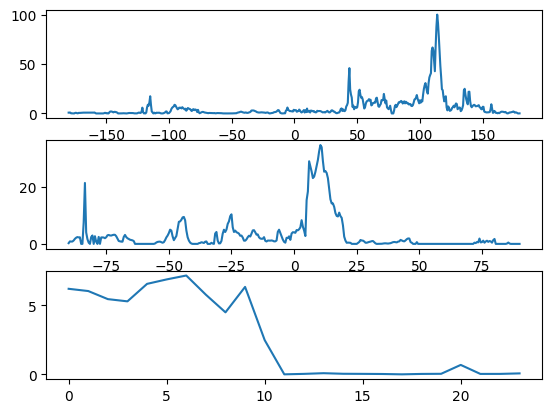

In [4]:
#Plotando o dado 1D
import matplotlib.pyplot as plt

fig,ax = plt.subplots(3)

#Para o tempo - time = 0 em y=250
ax[0].plot(dataset['lon'][:],pm25[0,250,:])
print(dataset['lat'][250])
#Para o tempo - time = 0 em x=250
ax[1].plot(dataset['lat'][:],pm25[0,:,200])
print(dataset['lon'][200])

#Para todo o tempo em um ponto específico
ax[2].plot(dataset['time'][:],pm25[:,250,100])

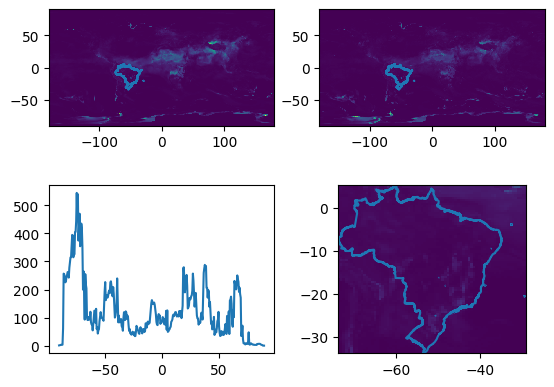

In [5]:
#Operações com o numpy
import numpy as np
import geopandas as gpd

br=gpd.read_file(r"C:\Users\DaphneCalazans\OneDrive - altageotecnia.com\Área de Trabalho\Daphne\Pessoal\Mestrado\Python_EA\ENS410064-\2024\dados\BR_Pais_2022\BR_Pais_2022.shp")


fig,ax = plt.subplots(2,2)

#Média do dia em todos os locais
ax[0,0].pcolor(dataset['lon'],dataset['lat'],np.mean(pm25,axis=0))
br.boundary.plot(ax=ax[0,0])

#Máximo do dia em todos os locais
ax[0,1].pcolor(dataset['lon'],dataset['lat'],np.max(pm25,axis=0))
br.boundary.plot(ax=ax[0,1])
# Zoom no BR para máximo do dia
ax[1,1].pcolor(dataset['lon'],dataset['lat'],np.max(pm25,axis=0))
br.boundary.plot(ax=ax[1,1])

ax[1,1].set_xlim([br.bounds.minx[0],br.bounds.maxx[0]])
ax[1,1].set_ylim([br.bounds.miny[0],br.bounds.maxy[0]])

#Máxima emissão em todas as latitudes
ax[1,0].plot(dataset['lat'][:],np.max(np.max(pm25[:,:,:],axis=0),axis=1))

In [13]:
# Abrir todos os arquivos da pasta
pastaDados="C:/Python/teste"
os.chdir(pastaDados)
#dataset = nc.MFDataset(prefixed)
#dataset

import xarray as xr
test=xr.open_mfdataset(prefixed)
pm25=test['MERRA_CNN_Surface_PM25']

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Python\\teste\\MERRA2_HAQAST_CNN_L4_V1.20240506.nc4'